#Hough Transform

links: http://bit.ly/2PR9YoR

# Python 버전 확인 및 OpenCV설치

In [0]:
!python --version

Python 3.6.8


In [0]:
!pip install opencv-python==3.4.2.16 && pip install opencv-contrib-python==3.4.2.16

# OpenCV 버전 확인

In [0]:
import cv2
cv2.__version__

'3.4.2'

# 실습 이미지 다운로드

## 이미지 다운로드

In [0]:
## For line detection
!wget http://aishack.in/static/img/tut/sudoku-original.jpg

## For circlr detection
# !wget https://res.cloudinary.com/print-bear/image/fetch/f_auto,q_auto:best/https://d21ii91i3y6o6h.cloudfront.net/products/1244/original/circle-stickers.jpg
!wget https://i.stack.imgur.com/XPtFB.png
!mv XPtFB.png circle.png

--2019-11-06 04:52:01--  http://aishack.in/static/img/tut/sudoku-original.jpg
Resolving aishack.in (aishack.in)... 50.116.7.87
Connecting to aishack.in (aishack.in)|50.116.7.87|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53178 (52K) [image/jpeg]
Saving to: ‘sudoku-original.jpg.1’

sudoku-original.jpg 100%[===================>]  51.93K  --.-KB/s    in 0.04s   

2019-11-06 04:52:01 (1.36 MB/s) - ‘sudoku-original.jpg.1’ saved [53178/53178]

--2019-11-06 04:52:03--  https://i.stack.imgur.com/XPtFB.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.1.35, 104.16.24.34, 104.16.31.34, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.1.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64264 (63K) [image/png]
Saving to: ‘XPtFB.png’

XPtFB.png           100%[===================>]  62.76K  --.-KB/s    in 0.007s  

2019-11-06 04:52:03 (8.44 MB/s) - ‘XPtFB.png’ saved [64264/64264]



## 기본 라이브러리 와 함수 선언

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# BGR image visualization
def bgrshow(img):
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap='gray')
    plt.grid(None)   
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Hough Line Transform

### 직선의 표현
![alt text](https://upload.wikimedia.org/wikipedia/commons/e/e6/R_theta_line.GIF)

임의의 한 직선은 $ r = x cos\theta + y sin \theta$ 로 나타낼 수 있다. 여기서 $r$ 은 원점에서 직선까지의 최단 거리를 말하고, $\theta$는 그 최단거리 직선의 기울기를 의미한다.

이를 이용하여 아래의 두 개의 직선은 오른쪽과 같이 $r \times \theta$평면에 표현될 수 있다.
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Hough-example-result-en.png/1200px-Hough-example-result-en.png" width="700px">
</div>


### Hough Line Transform 동작 방법

<div>
<img src="https://docs.opencv.org/3.4.1/houghlinesdemo.gif" width="700px">
</div>

$0\leq r \leq $ 이미지의 대각선 

$0 \leq \theta \leq 180$

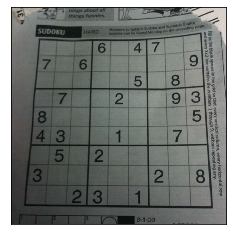

In [0]:
# 이미지 출력
img = cv2.imread('sudoku-original.jpg')

plt.imshow(img)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.show()

### 함수 설명

```
OutputArray cv::HoughLines	(	
    InputArray 	 image,          # 입력 이미지
    double 	rho,                 # Distance resolution
    double 	theta,               # Angle resolution
    int 	   threshold,           # Accumulator 임계치
    double 	srn = 0,             # Distance resolution divisor
    double 	stn = 0,             # Algle resolution divisor
    double 	min_theta = 0,       # Minimum Angle
    double 	max_theta = CV_PI    # Maximum Angle
)	
```


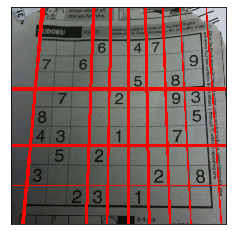

In [0]:
# Line Detection
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

bgrshow(img)

### cf. Probabilistic Hough Transform

Hough Transform의 연산량을 감소 시킨 버전

![alt text](https://docs.opencv.org/3.4.1/houghlines4.png)



## Hough Circle Transform

### 함수 설명

```
OutputArray cv::HoughCircles	(	
    InputArray 	 image,       # 입력 이미지
    int 	method,              # HOUGH_GRADIENT만 구현됨
    double 	dp,               # Inverse ratio of the accumulator resolution to the image resolution. 
    double 	minDist,          # 검색된 원 간의 거리
    double 	param1 = 100,     # Canny edge의 threshold (HOUGH_GRADIENT)
    double 	param2 = 100,     # Accumulator threshold (circle center - detection stage)
    int 	minRadius = 0,       # 최소 원의 반경
    int 	maxRadius = 0        # 최대 원의 반경
)		
```


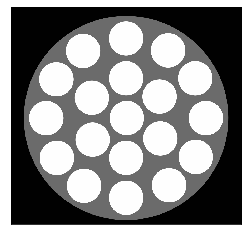

In [0]:
## 이미지 출력
img = cv2.imread('circle.png', 0)

plt.imshow(img, cmap='gray')
plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.show()

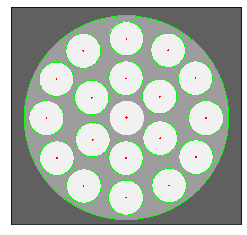

In [0]:
img = cv2.medianBlur(img,3)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,100,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

bgrshow(cimg)

### 빠진 원 찾기

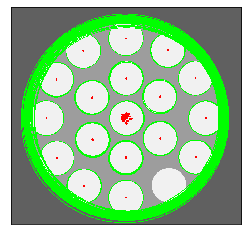

In [0]:
#@title Change Parameters { run: "auto" }

mindist = 1 #@param {type: "slider", min: 1, max: 200}
param1 = 73 #@param {type: "slider", min: 1, max: 100}
param2 = 90#@param {type: "slider", min: 1, max: 100}
minRad = 0 #@param {type: "slider", min: 0, max: 200}
maxRad = 0 #@param {type: "slider", min: 0, max: 400}

cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,mindist,
                            param1=param1,param2=param2,minRadius=minRad,maxRadius=maxRad)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

bgrshow(cimg)

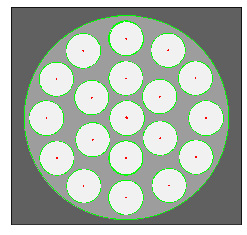

In [0]:
img = cv2.medianBlur(img,3)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,100,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,100,
                            param1=50,param2=30,minRadius=0,maxRadius=100)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

bgrshow(cimg)